<a href="https://colab.research.google.com/github/vidhi-sys/PyTorch_DeepLearning_TensorFlow/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn # nn contains all of pyrotchs nueral networks building block

[Vedio Followed ](https://youtu.be/Z_ikDlimN6A)

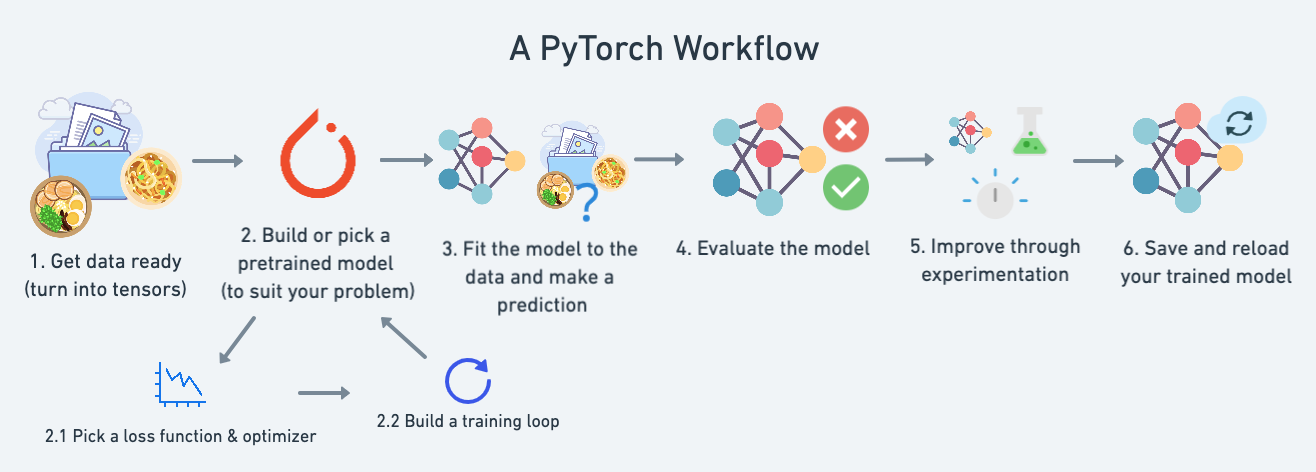

#  1. Data Preparing and Loading

In [3]:
torch.__version__

'2.8.0+cu126'

In [9]:
# using linear regression formulas with known parameters
weight = 0.9
bias = 0.3
# w and b are known we create model that estimates these parameters
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
len(X), len(y)

(50, 50)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# 2. Build A Model

In [20]:
def graph(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="r",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="b",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",s=4,label="Predictions")

  plt.legend(prop={"size":14});


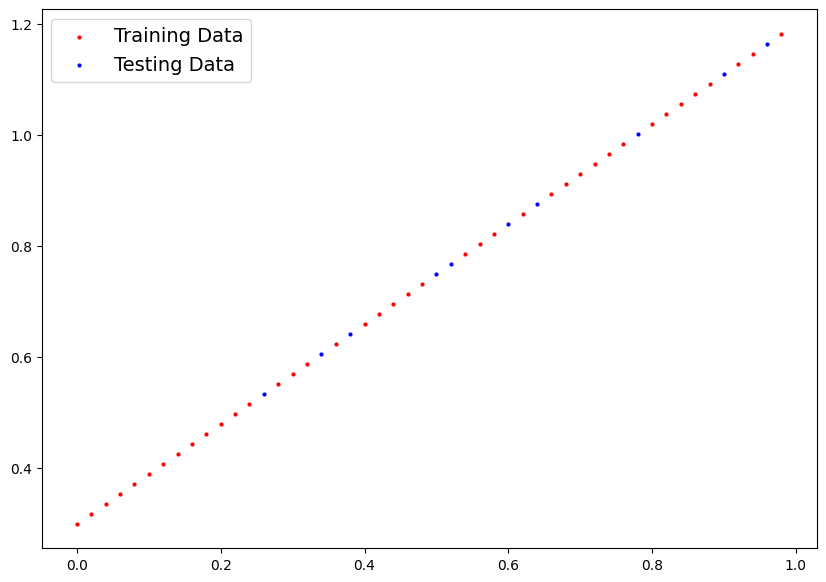

In [21]:
graph();

In [24]:
class linear_model(nn.Module):
  def __init__(self):#constructor
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,X:torch.Tensor)->torch.Tensor:
    #forward is what computation our model does
    return self.weights * X + self.bias


# Model Building Essentials


*   torch.nn ->contains building blocks for compuatonal graph

*   torch.nn.module->base class for all nn modules if u subclass u should   ovveride fwd method

* torch.optim->optimises in pytorch live helping with gradient descent*




In [32]:
# Create a Random Seed doesnt get diff values everytime
torch.manual_seed(72)
# Create an instance of  Linear Model
model_0 = linear_model()
list(model_0.parameters())


[Parameter containing:
 tensor([-1.0001], requires_grad=True),
 Parameter containing:
 tensor([-0.7250], requires_grad=True)]

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.0001])), ('bias', tensor([-0.7250]))])

### Making Predictions `torch.inference_mode()`

In [35]:
with torch.inference_mode():
  y_pred=model_0(X_test)
y_pred

tensor([[-0.9851],
        [-1.5051],
        [-1.3251],
        [-1.6251],
        [-1.0651],
        [-1.6851],
        [-1.2451],
        [-1.2251],
        [-1.3651],
        [-1.1051]])

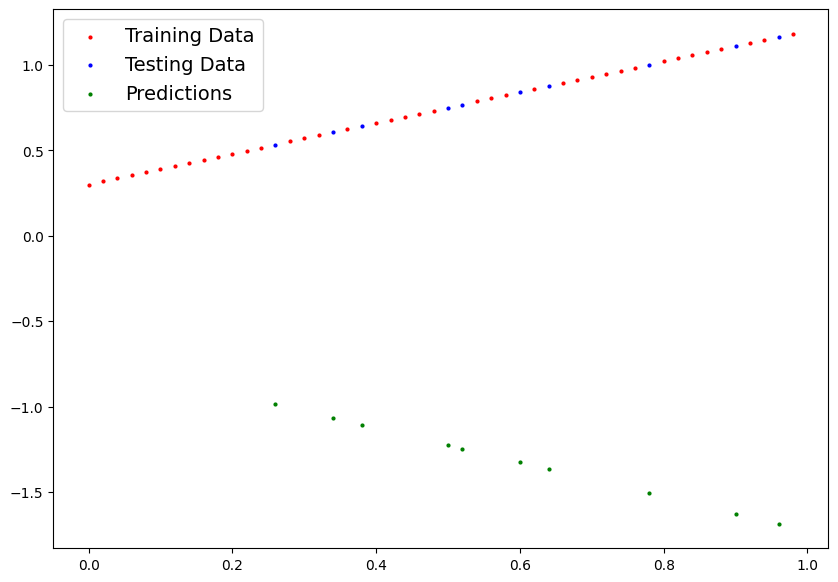

In [36]:
graph(predictions=y_pred)

# Refrences:

* [Gradient Descent](https://bhatnagar91.medium.com/how-neural-networks-learn-using-gradient-descent-f48c2e4079a6)
* [torch.nn](https://medium.com/@sahin.samia/mastering-the-basics-of-torch-nn-a-comprehensive-guide-to-pytorchs-neural-network-module-9f2d704e8c7f)

* [Inference ](https://medium.com/@whyamit404/inference-in-pytorch-understanding-the-wrappers-and-choosing-the-best-d4f16fbde960)
* [Back-Propagation ](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/)
